In [1]:
import pandas as pd 
from fnmatch import fnmatch
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
# style.use('ggplot')
import itertools

from IPython.display import display
import seaborn as sns
# from functools import reduce
import subprocess
import math
import csv

In [2]:
idx_res = []
mse_res = []
ndcg_res = []
model_res = []

for i in range(11,22):
	combined_csv = pd.read_csv("simulation"+str(i)+"_sg_th2_allres.csv")

	models = ["wmf_obs", "wmf_cau_ips", "wmf_cau_user_add", "wmf_cau_const_add", \
	"pmf_obs", "pmf_cau_ips", "pmf_cau_user_add", "pmf_cau_const_add", \
	"pf_obs", "pf_cau_ips", "pf_cau_user_add", "pf_cau_const_add"]

	for method in models:
		print(method, combined_csv[[fnmatch(model, "*"+method+"*") for model in combined_csv["model"]]].sort_values("vad_ndcg")[["model", "alpha", "binary", "test_mse", "test_ndcg"]][-5:])

	idx_res.append(i*np.ones(len(models)))
	model_res.append(np.squeeze(np.array([np.array(combined_csv[[fnmatch(model, "*"+method+"*") for model in combined_csv["model"]]].sort_values("vad_ndcg")[["model"]][-1:]) for method in models])))
	mse_res.append(np.squeeze(np.array([np.array(combined_csv[[fnmatch(model, "*"+method+"*") for model in combined_csv["model"]]].sort_values("vad_ndcg")[["test_mse"]][-1:]) for method in models])))
	ndcg_res.append(np.squeeze(np.array([np.array(combined_csv[[fnmatch(model, "*"+method+"*") for model in combined_csv["model"]]].sort_values("vad_ndcg")[["test_ndcg"]][-1:]) for method in models])))

res = pd.DataFrame({"model": np.concatenate(np.array(model_res)), \
	"mse": np.concatenate(np.array(mse_res)), \
	"ndcg": np.concatenate(np.array(ndcg_res)), \
	"simid": np.concatenate(np.array(idx_res))})

res['mse'] = np.array([mse[0][0] if len(mse) > 0 else -1 for mse in res['mse']])
res['ndcg'] = np.array([mse[0][0] if len(mse) > 0 else -1 for mse in res['ndcg']])
res['model'] = np.array([mse[0][0] if len(mse) > 0 else -1 for mse in res['model']])

wmf_obs           model  alpha  binary  test_mse  test_ndcg
230  sg_wmf_obs     40       0  1.586903   0.751549
214  sg_wmf_obs     40       0  1.598125   0.749616
210  sg_wmf_obs     40       0  1.581660   0.749220
287  sg_wmf_obs     40       0  1.592655   0.758661
285  sg_wmf_obs     40       0  1.571276   0.758589
wmf_cau_ips Empty DataFrame
Columns: [model, alpha, binary, test_mse, test_ndcg]
Index: []
wmf_cau_user_add                    model  alpha  binary  test_mse  test_ndcg
360  sg_wmf_cau_user_add     40       0  1.522914   0.772048
343  sg_wmf_cau_user_add     40       0  1.531638   0.769075
328  sg_wmf_cau_user_add     40       0  1.532272   0.765501
338  sg_wmf_cau_user_add     40       0  1.527520   0.767664
274  sg_wmf_cau_user_add     40       0  1.525665   0.757534
wmf_cau_const_add                     model  alpha  binary  test_mse  test_ndcg
376  sg_wmf_cau_const_add     40       0  1.485351   0.777436
368  sg_wmf_cau_const_add     40       0  1.481075   0.773664
38

wmf_obs           model  alpha  binary  test_mse  test_ndcg
247  sg_wmf_obs     40       0  1.619834   0.750487
215  sg_wmf_obs     40       0  1.628292   0.745514
293  sg_wmf_obs     40       0  1.625167   0.755794
244  sg_wmf_obs     40       0  1.625088   0.750110
202  sg_wmf_obs     40       0  1.629939   0.743665
wmf_cau_ips Empty DataFrame
Columns: [model, alpha, binary, test_mse, test_ndcg]
Index: []
wmf_cau_user_add                    model  alpha  binary  test_mse  test_ndcg
333  sg_wmf_cau_user_add     40       0  1.564743   0.764275
354  sg_wmf_cau_user_add     40       0  1.574312   0.769615
367  sg_wmf_cau_user_add     40       0  1.562344   0.775171
329  sg_wmf_cau_user_add     40       0  1.560490   0.763892
325  sg_wmf_cau_user_add     40       0  1.561408   0.762333
wmf_cau_const_add                     model  alpha  binary  test_mse  test_ndcg
379  sg_wmf_cau_const_add     40       0  1.525352   0.785782
383  sg_wmf_cau_const_add     40       0  1.472697   0.788125
37

wmf_obs           model  alpha  binary  test_mse  test_ndcg
196  sg_wmf_obs     40       0  1.725969   0.768915
273  sg_wmf_obs     40       0  1.715643   0.780405
256  sg_wmf_obs     40       0  1.724041   0.778009
271  sg_wmf_obs     40       0  1.733412   0.780351
211  sg_wmf_obs     40       0  1.726224   0.771653
wmf_cau_ips Empty DataFrame
Columns: [model, alpha, binary, test_mse, test_ndcg]
Index: []
wmf_cau_user_add                    model  alpha  binary  test_mse  test_ndcg
358  sg_wmf_cau_user_add     40       0  1.653309   0.797281
328  sg_wmf_cau_user_add     40       0  1.660912   0.790673
353  sg_wmf_cau_user_add     40       0  1.655392   0.795625
312  sg_wmf_cau_user_add     40       0  1.648879   0.787735
352  sg_wmf_cau_user_add     40       0  1.658200   0.795548
wmf_cau_const_add                     model  alpha  binary  test_mse  test_ndcg
377  sg_wmf_cau_const_add     40       0  1.603408   0.809812
375  sg_wmf_cau_const_add     40       0  1.575228   0.807342
37

wmf_obs           model  alpha  binary  test_mse  test_ndcg
211  sg_wmf_obs     40       0  1.732176   0.763232
221  sg_wmf_obs     40       0  1.730185   0.764656
205  sg_wmf_obs     40       0  1.719756   0.762169
292  sg_wmf_obs     40       0  1.721235   0.777019
267  sg_wmf_obs     40       0  1.722903   0.771129
wmf_cau_ips Empty DataFrame
Columns: [model, alpha, binary, test_mse, test_ndcg]
Index: []
wmf_cau_user_add                    model  alpha  binary  test_mse  test_ndcg
305  sg_wmf_cau_user_add     40       0  1.663310   0.779195
296  sg_wmf_cau_user_add     40       0  1.671825   0.777751
331  sg_wmf_cau_user_add     40       0  1.667252   0.786410
335  sg_wmf_cau_user_add     40       0  1.643717   0.787665
317  sg_wmf_cau_user_add     40       0  1.662291   0.782247
wmf_cau_const_add                     model  alpha  binary  test_mse  test_ndcg
351  sg_wmf_cau_const_add     40       0  1.618050   0.801545
348  sg_wmf_cau_const_add     40       0  1.574309   0.797771
34

In [3]:
res.to_csv('simulation_fixgamma_sg_th2_allres.csv')

In [4]:

pmf = gaussian_filter1d(res[res["model"]=="sg_pmf_obs"]["ndcg"],sigma=1.5)
dcf_pmf = gaussian_filter1d(res[res["model"]=="sg_pmf_cau_const_add"]["ndcg"],sigma=1.5)
ips_pmf = gaussian_filter1d(res[res["model"]=="sg_pmf_cau_ips"]["ndcg"],sigma=1.5)
pf = gaussian_filter1d(res[res["model"]=="sg_pf_obs"]["ndcg"],sigma=1.5)
dcf_pf = gaussian_filter1d(res[res["model"]=="sg_pf_cau_user_add"]["ndcg"],sigma=1.5)
ips_pf = gaussian_filter1d(res[res["model"]=="sg_pf_cau_ips"]["ndcg"],sigma=1.5)
wmf = gaussian_filter1d(res[res["model"]=="sg_wmf_obs"]["ndcg"], sigma=1.5)
dcf_wmf = gaussian_filter1d(res[res["model"]=="sg_wmf_cau_const_add"]["ndcg"],sigma=1.5)
ips_wmf = gaussian_filter1d(res[res["model"]=="sg_wmf_cau_ips"]["ndcg"],sigma=1.5)




In [5]:
gamma_y = np.arange(11) * 0.5
gamma_theta = np.arange(11) * 0.1

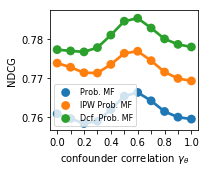

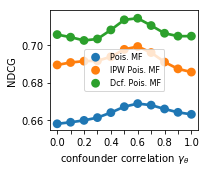

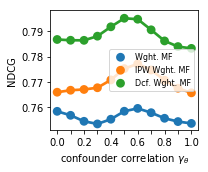

In [6]:
pmf_res = pd.DataFrame({'ndcg': np.concatenate([pmf, ips_pmf, dcf_pmf]), \
                    'gamma_y': np.tile(np.arange(len(gamma_y)),(1,3))[0], \
                   'algo': np.repeat(['Prob. MF', 'IPW Prob. MF', 'Dcf. Prob. MF'], len(gamma_y))})

fig = plt.figure(figsize=(3,2.5))
sns.pointplot(x="gamma_y", y="ndcg", hue="algo", data=pmf_res, fig=fig, linewidth=1, markersize=1)
plt.xticks(np.arange(11), np.array([0.0 , '', 0.2 , '', 0.4 , '', 0.6 , '', 0.8 , '',
       1.0 ]))
plt.ylabel('NDCG')
plt.xlabel('confounder correlation ' + r'$\gamma_\theta$')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('sim_ndcg_gamma_theta_pmf.pdf')

pf_res = pd.DataFrame({'ndcg': np.concatenate([pf, ips_pf, dcf_pf]), \
                    'gamma_y': np.tile(np.arange(len(gamma_y)),(1,3))[0], \
                   'algo': np.repeat(['Pois. MF', 'IPW Pois. MF', 'Dcf. Pois. MF'], len(gamma_y))})

fig = plt.figure(figsize=(3,2.5))
sns.pointplot(x="gamma_y", y="ndcg", hue="algo", data=pf_res, fig=fig, linewidth=1, markersize=1)
plt.xticks(np.arange(11), np.array([0.0 , '', 0.2 , '', 0.4 , '', 0.6 , '', 0.8 , '',
       1.0 ]))
plt.ylabel('NDCG')
plt.xlabel('confounder correlation ' + r'$\gamma_\theta$')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('sim_ndcg_gamma_theta_pf.pdf')

wmf_res = pd.DataFrame({'ndcg': np.concatenate([wmf, ips_wmf, dcf_wmf]), \
                    'gamma_y': np.tile(np.arange(len(gamma_y)),(1,3))[0], \
                   'algo': np.repeat(['Wght. MF', 'IPW Wght. MF', 'Dcf. Wght. MF'], len(gamma_y))})

fig = plt.figure(figsize=(3,2.5))
sns.pointplot(x="gamma_y", y="ndcg", hue="algo", data=wmf_res, fig=fig, linewidth=1, markersize=1)
plt.xticks(np.arange(11), np.array([0.0 , '', 0.2 , '', 0.4 , '', 0.6 , '', 0.8 , '',
       1.0 ]))
plt.ylabel('NDCG')
plt.xlabel('confounder correlation ' + r'$\gamma_\theta$')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('sim_ndcg_gamma_theta_wmf.pdf')